## Orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Earth characteristics

In [2]:
e_mass = 5.972e24
e_radius = 6.37e6
G = 6.67e-11

#### Object mass

In [3]:
o_mass= 100

#### Functions

Function to calculate the distance from any point to the origin - centre of the Earth

In [4]:
def distance_to_e(x, y):
    dist = (x**2 + y**2)**(0.5)
    return dist

Function to calculate the acceleration due to gravity on an object given its mass, the planet mass and the distance between their centres

In [5]:
def gravity(dist, p_mass, o_mass):
    F = (p_mass * o_mass * G) / (dist**2)
    acc = F / o_mass
    return acc

Function to calculate the angle formed by the straight line between the centres of the Earth and the object at the beginning of the simulation -negative y axis- and at any given time 

In [6]:
def angle_to_e(x, y):
    angle = np.arctan2(y, x)
    return angle

Function to calculate the components of the acceleration given the total acceleration and the angle 

In [7]:
def acc_components(acc, angle_e):
    accx = - acc * np.cos(angle_e)
    accy = - acc * np.sin(angle_e)
    return(accx, accy)

Function to calculate a trajectory or orbit

In [8]:
def calculate_trajectory(x_pos, y_pos, x, y, vx, vy, timestep0, timemax):
    timecurrent = 0
    crossleft = False
    crossright = False
    while timecurrent <= timemax:
        distance = distance_to_e(x,y)
        if distance <= e_radius:
            break
        timestep = max(0.01, min(timestep0, (distance / 5e8)**3 * timestep0))
        x = x + vx * timestep
        y = y + vy * timestep
        if crossleft == True:
            if x > 0.1:
                break
        acc = gravity(distance, e_mass, o_mass)
        angle_e = angle_to_e(x, y)
        [accx, accy] = acc_components(acc, angle_e)
        vx = vx + accx * timestep
        vy = vy + accy * timestep
        x_pos.append(x)
        y_pos.append(y)
        timecurrent = timecurrent + timestep
        if crossright == False:
            if x > 0.1:
                crossright = True
        if crossright == True:
            if crossleft == False:
                if x < 0.01:
                    crossleft = True
    return(x_pos, y_pos)

Functions to plot a trajectory or orbit

In [9]:
def plot_one_orbit(x_pos, y_pos):
    furthestpoint = max(abs(np.array(x_pos)) + abs(np.array(y_pos)))
    this_xaxis0 = -1.1 * furthestpoint
    this_xaxis1 = 1.1 * furthestpoint
    this_yaxis0 = -1.1 * furthestpoint
    this_yaxis1 = 1.1 * furthestpoint
    plt.plot(x_pos, y_pos)
    plt.axis((this_xaxis0, this_xaxis1, this_yaxis0, this_yaxis1))
    plt.scatter(0,0, color='red', s=100)
    plt.title('Trajectory')

In [10]:
def plot_this_orbit(i, j, x_pos, y_pos):
    furthestpoint = max(abs(np.array(x_pos)) + abs(np.array(y_pos)))
    this_xaxis0 = -1.1 * furthestpoint
    this_xaxis1 = 1.1 * furthestpoint
    this_yaxis0 = -1.1 * furthestpoint
    this_yaxis1 = 1.1 * furthestpoint
    plotrow = i // 3
    plotcolumn = i % 3
    ax[plotrow, plotcolumn].plot(x_pos, y_pos)
    ax[plotrow, plotcolumn].axis((this_xaxis0, this_xaxis1, this_yaxis0, this_yaxis1))
    ax[plotrow, plotcolumn].scatter(0,0, color='red', s=100)
    ax[plotrow, plotcolumn].title.set_text(f'{j} m/s')

#### Initial conditions

In [11]:
x = 0
y = -3.94e8
v = 100
angle_v = 0

In [12]:
timemax = 1e8
timestep0 = 1000

In [13]:
vx = v * np.cos(np.radians(angle_v))
vy = v * np.sin(np.radians(angle_v))

In [14]:
x_pos = [x]
y_pos = [y]
angle = [np.arctan2(y,x)]
times = [0]

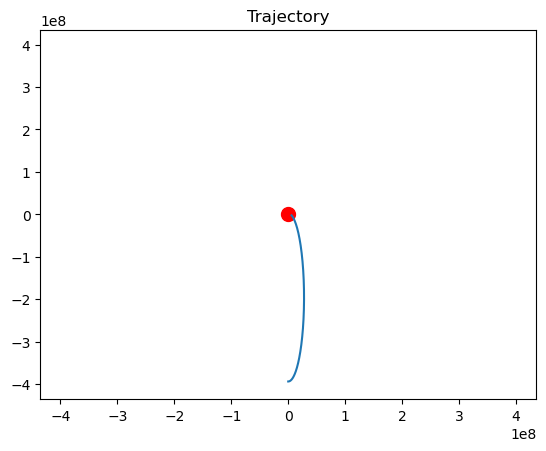

In [15]:
[x_pos, y_pos] = calculate_trajectory(x_pos, y_pos, x, y, vx, vy, timestep0, timemax)
plot_one_orbit(x_pos, y_pos)

#### Experiment with different initial velocities

In [16]:
velocities = [0, 50, 120, 160, 250, 400, 600, 800, 900, 950, 1000, 1100, 1200, 1300, 1380, 
              1400, 1410, 1420, 1500, 1800, 2500, 3000, 5000, 10000]

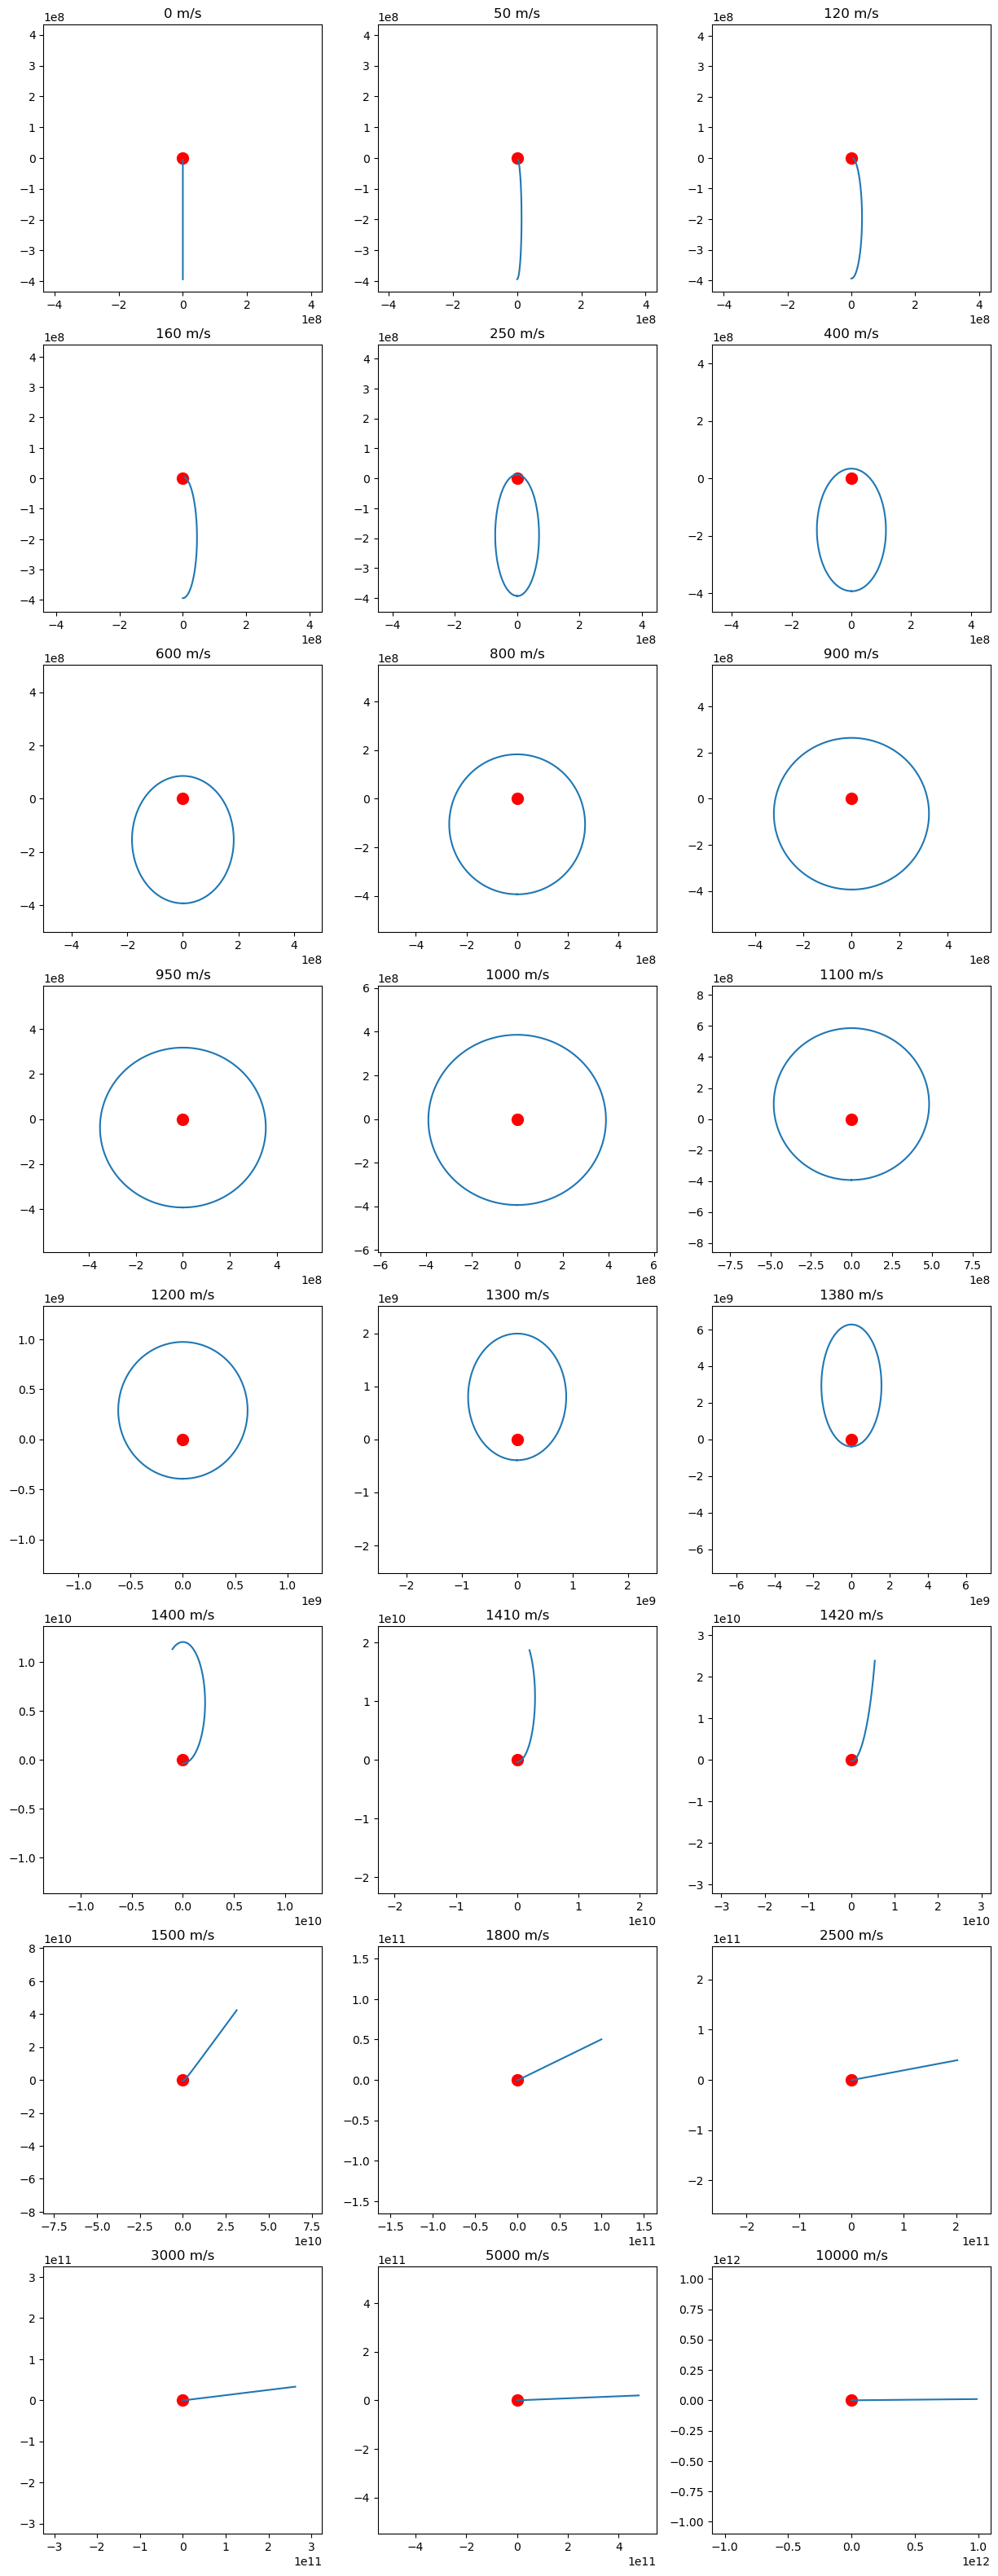

In [17]:
fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(15,40))
for i,j in enumerate(velocities):
    x = 0
    y = -3.94e8
    v = j
    angle_v = 0
    time = 1e8
    timestep0 = 1000
    #time = int(time)
    vx = v * np.cos(np.radians(angle_v))
    vy = v * np.sin(np.radians(angle_v))
    x_pos = [x]
    y_pos = [y]
    [x_pos, y_pos] = calculate_trajectory(x_pos, y_pos, x, y, vx, vy, timestep0, timemax)
    plot_this_orbit(i, j, x_pos, y_pos, )  